In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Question-1
#### a) For the image shown in a), calculate the centroids of each object and display them in red color. Note: you cannot use Image Moments to find centroids

#### 1: Define the structuring element for dilation and erosion as a 3x3 matrix filled with ones using NumPy's np.ones() function.
#### 2:  Apply erosion operation on the input image img using the cv2.erode() function with the defined kernel and 5 iterations, and store the result in the img_erosion variable.
#### 3: Apply dilation operation on the eroded image img_erosion using the cv2.dilate() function with the same kernel and iterations, and store the result in the img_dilation variable.

#### 4: Threshold the dilated image img_dilation using the cv2.threshold() function to convert it to a binary image.
#### 5: Find contours in the thresholded image using the cv2.findContours() function, and store the contours and hierarchy in the contours and hierarchy variables, respectively.
#### 6: Loop over each contour in contours, calculate its centroid using the cv2.boundingRect() function, and append it to the centroids list.


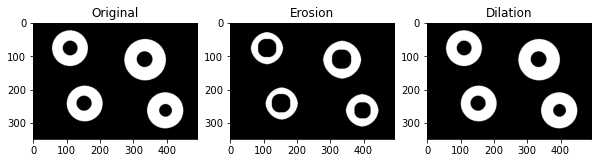

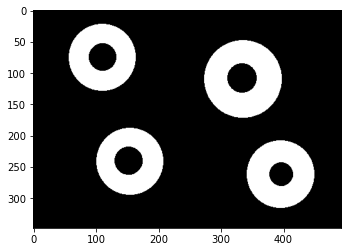

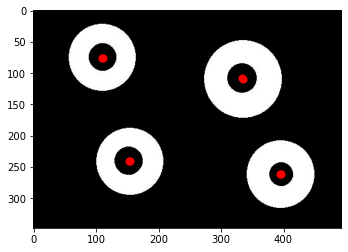

In [15]:
# Load the image
img = cv2.imread(r'./data/circle3.jpg', cv2.IMREAD_GRAYSCALE)

# Define the structuring element for dilation and erosion
kernel = np.ones((3, 3), np.uint8)

# Apply morphological operations for region filling
img_erosion = cv2.erode(img, kernel, iterations=5)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=5)

# Display the original, erosion, and dilation images using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_erosion, cmap='gray')
axs[1].set_title('Erosion')

axs[2].imshow(img_dilation, cmap='gray')
axs[2].set_title('Dilation')

plt.show()

# Calculate the centroids of each object
ret, thresh = cv2.threshold(img_dilation, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()
centroids = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cx = int(x + w/2)
    cy = int(y + h/2)
    centroids.append((cx, cy))

# Display the image with centroids in red color
plt.imshow(img_dilation, cmap='gray')
for c in centroids:
    plt.scatter(c[0], c[1], s=50, c='r', marker='o')
plt.show()


### b) Fill the holes of these objects (figure-1 a) using Morphological Dilation as discussed in class. You can use the centroids calculated in a) as marker points for dilation to fill the centers.

#### 1- Define a 15x15 cross-shaped kernel for dilation 
#### 2- Create a marker image with the centroids in white color. The marker image is initialized with all zeros using np.zeros_like() function and then the centroids are set to 255 (white).
#### 3- Apply dilation to the marker image with the kernel defined in step 2 to fill the centers using cv2.dilate() function and store the result in dilated_img

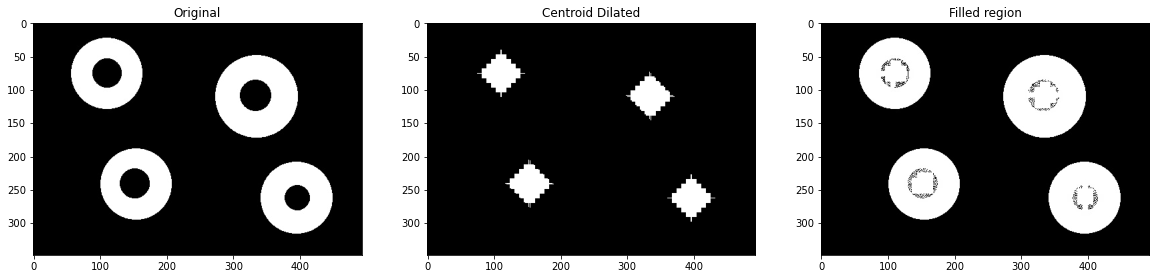

In [16]:
img = cv2.imread(r'./data/circle3.jpg', cv2.IMREAD_GRAYSCALE)

# Define a 13x13 cross-shaped kernel for dilation
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (15,15))



# Create a marker image with the centroids in white color
marker_img = np.zeros_like(img)
for c in centroids:
    marker_img[c[1], c[0]] = 255

# Apply dilation with marker points to fill the centers
dilated_img = cv2.dilate(marker_img, kernel, iterations=5)

# Display the original and dilated images using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow( dilated_img, cmap='gray')
axs[1].set_title('Centroid Dilated')


axs[2].imshow(img + dilated_img, cmap='gray')
axs[2].set_title('Filled region')


plt.show()


# c) Calculate the diameter of the biggest hole (figure-1 a) and display its diameter above that circle in green color.

#### 1- Threshold the input image to create a binary image where white represents the region of interest.
#### 2- Find contours in the binary image using cv2.findContours() function.
#### 3- Create a copy of the input image to draw the diameter of the largest circle on.
#### 4- Keep track of the contour with the largest diameter found so far.
#### 5- Draw a circle with the diameter on the copy of the input image and display the diameter value on the image.
#### 6- Draw a rectangle with the largest diameter on the copy of the input image.

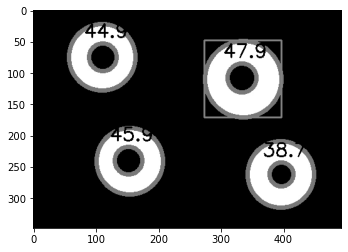

In [19]:
# Threshold the image to create a binary image
_, thresh = cv2.threshold(image, 220, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_diameter = 0
max_contour = None

# Create a copy of the original image to draw the diameters on
image_diameters = np.copy(image)
centroids = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cX = int(x + w/2)
    cY = int(y + h/2)
    centroids.append((cx, cy))
    
    
    # Calculate the area of the contour
    area = cv2.contourArea(c)
    
    # Calculate the diameter of the circle with the same area as the contour
    diameter = 2 * np.sqrt(area / np.pi)
    
    
    # Check if this is the largest diameter so far
    if diameter > max_diameter:
        max_diameter = diameter
        max_contour = c
        D_cX = cX
        D_cY = cY
        
    
        # Draw a circle with the diameter on the image
    cv2.circle(image_diameters, (cX, cY), int(diameter / 2), (120, 120, 0), 6)
    
    # Display the value of the diameter on the image in green color

    font = cv2.FONT_HERSHEY_SIMPLEX
    text = '{:.1f}'.format(diameter)
    cv2.putText(image_diameters, text, (cX - 30, cY - int(diameter/2) - 10), font, 1, (0, 255, 0), 2)
    

# Calculate the coordinates of the top-left and bottom-right corners of the rectangle
x1 = int(D_cX - max_diameter / 2)
y1 = int(D_cY - max_diameter / 2)
x2 = int(D_cX + max_diameter / 2)
y2 = int(D_cY + max_diameter / 2)

# Draw a rectangle with the largest diameter on the image
cv2.rectangle(image_diameters, (x1, y1), (x2, y2), (130, 255, 0), 2)


    
plt.imshow(cv2.cvtColor(image_diameters, cv2.COLOR_BGR2RGB))
plt.show()

# d)  count the number of objects with holes and without holes and display the count

#### 1- Thresholding method is applied to create a binary image, where the background is black and the objects are white.
#### 2- The findContours() function from OpenCV is used to find contours in the binary image.
#### 3- Two counters are initialized to keep track of the number of circles with and without holes.
#### 4- The code loops over each contour found in the image.
#### 5- For each contour, the area is calculated using the contourArea() function.
#### 6- The code checks if the area of the contour is within a certain range to filter out noise.

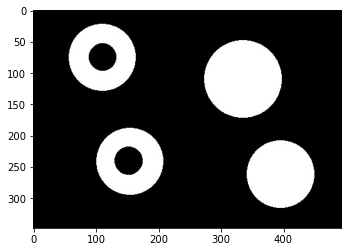

Circles with holes: 2
Circles without holes: 2


In [23]:

# Load the image in grayscale
image = cv2.imread(r'./data/circles.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# Apply Otsu's thresholding to create a binary image
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Initialize counters for circles with and without holes
with_holes = 0
without_holes = 0

# Loop over the contours and count the number of circles with and without holes
for c in contours:
    # Calculate the area of the current contour
    area = cv2.contourArea(c)
    
    # Check if the area of the contour is within a certain range to filter out noise
    if area > 50 and area < 2500:
        with_holes += 1

            
    if area > 9200 and area < 25000:
        without_holes += 1
        

# Display the counts of circles with and without holes
print(f"Circles with holes: {with_holes}")
print(f"Circles without holes: {without_holes}")



# Question 2.
## For the image shown in Figure 2, find the number of persons in the image. Draw a bounding box around each person and display the image.

#### 1- Apply bilateral filtering on the input image img with a filter size of 15x15 and sigma values of 15.

#### 2- Threshold the filtered image using a threshold value of 140, and set all pixel values below this threshold to 0. The thresholding mode used here is cv2.THRESH_TOZERO, which means all pixel values above the threshold are kept as is, while pixel values below the threshold are set to 0.

#### 3- Define a 5x5 kernel of ones to use for morphological operations.

#### 4- Perform erosion operation on the thresholded image to remove small objects and noise.

#### 5- Perform dilation operation on the eroded image to fill in gaps and expand the remaining objects.

#### 6- Find contours in the dilated image using cv2.findContours function. The cv2.RETR_EXTERNAL flag retrieves only the external contours and cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.

#### 7- Define minimum and maximum area thresholds for the detected contours.

#### 8- Draw a green bounding box around each remaining contour in the img_bbox image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


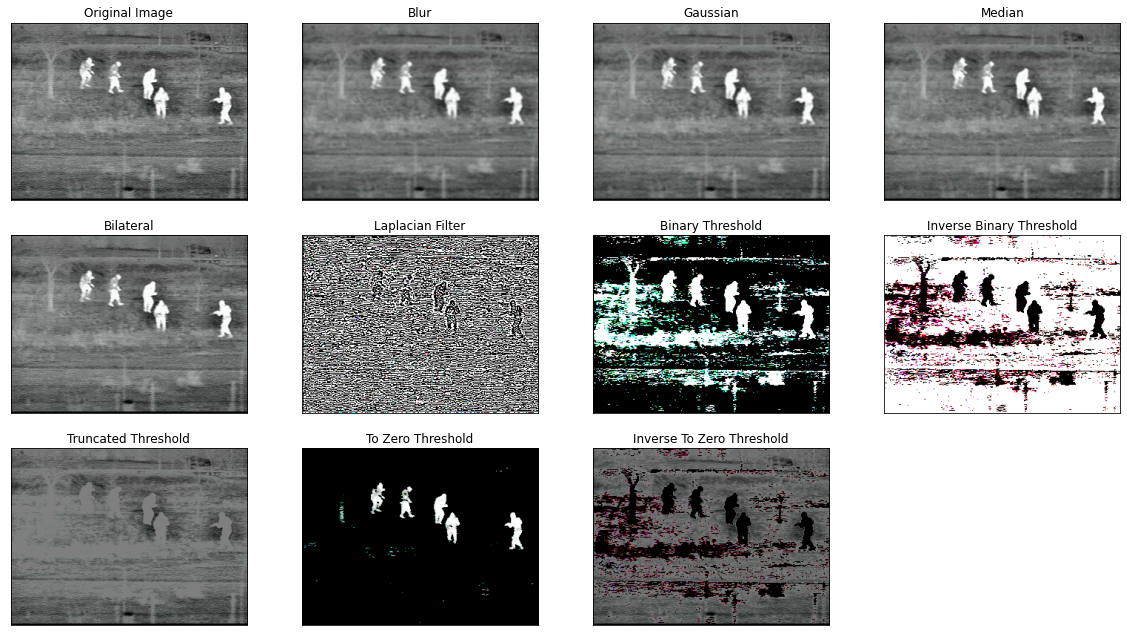

In [24]:

# Load the image
img = cv2.imread('./data/thermal.jpg')



# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)
# Apply filters

blur = cv2.blur(img, (3, 3))

gaussian = cv2.GaussianBlur(img, (3, 3), 0)

median = cv2.medianBlur(img, 3)

bilateral = cv2.bilateralFilter(img, 15, 15, 15)




# Apply all threshold filters
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 170, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Display the original image and all filtered images
titles = ['Original Image','Blur','Gaussian','Median','Bilateral', 'Laplacian Filter', 'Binary Threshold', 'Inverse Binary Threshold',
          'Truncated Threshold', 'To Zero Threshold', 'Inverse To Zero Threshold']
images = [img,blur,gaussian,median,bilateral, laplacian, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(11):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


Number of people in the image: 5


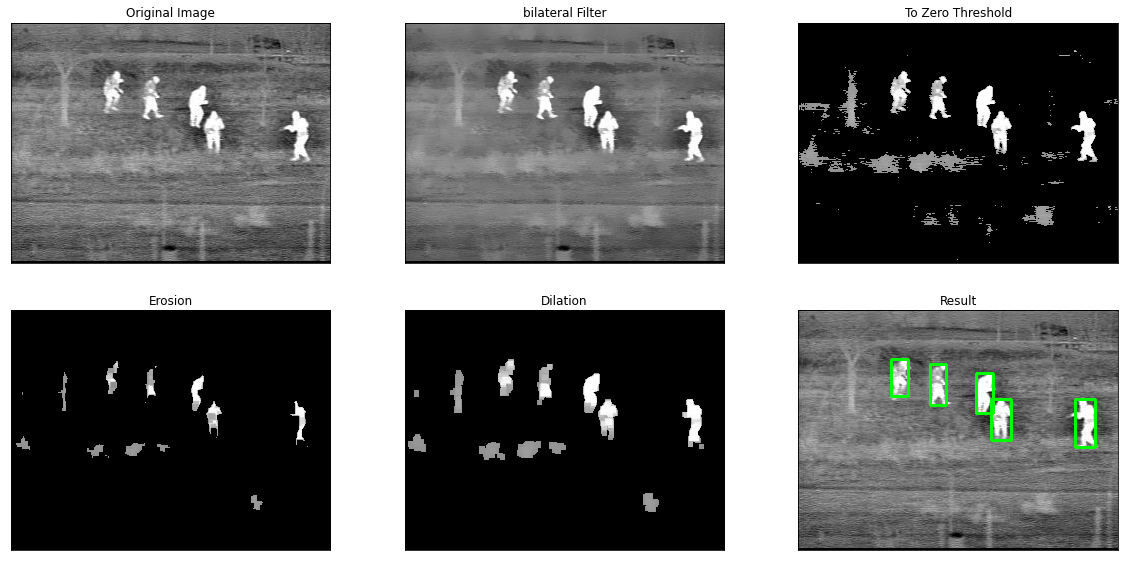

In [25]:
# Load the thermal image in grayscale
img = cv2.imread(r'./data/thermal.jpg',0)
num_people=0
bilateral = cv2.bilateralFilter(img, 15, 15, 15)


ret, thresh = cv2.threshold(bilateral, 140, 255, cv2.THRESH_TOZERO)


# Apply morphological operations to clean up the image
kernel = np.ones((5, 5), np.uint8)
Erosion = cv2.erode(thresh, kernel, iterations=1)
Dilation = cv2.dilate(Erosion, kernel, iterations=1)

# Find contours in the image
contours, _ = cv2.findContours(Dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small and large contours
min_area = 300
max_area = 5000
contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

# Draw bounding boxes around the remaining contours
img_bbox = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)
    num_people =num_people+1


print('Number of people in the image:', num_people)
# Display the original image
titles = ['Original Image', 'bilateral Filter','To Zero Threshold', 'Erosion','Dilation','Result']
images = [img, bilateral, thresh, Erosion, Dilation, img_bbox]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Question 3.
## a) For the image shown in Figure 3, count the number of text lines in the image

#### 1- Apply adaptive thresholding to create a binary image with the text in black and background in white
#### 2- Apply morphological operations dilation  fill gaps in the text
#### 3- connected component analysis on the binary image dilation, which means that it identifies distinct regions of the image that are connected together.

Number of text lines: 11


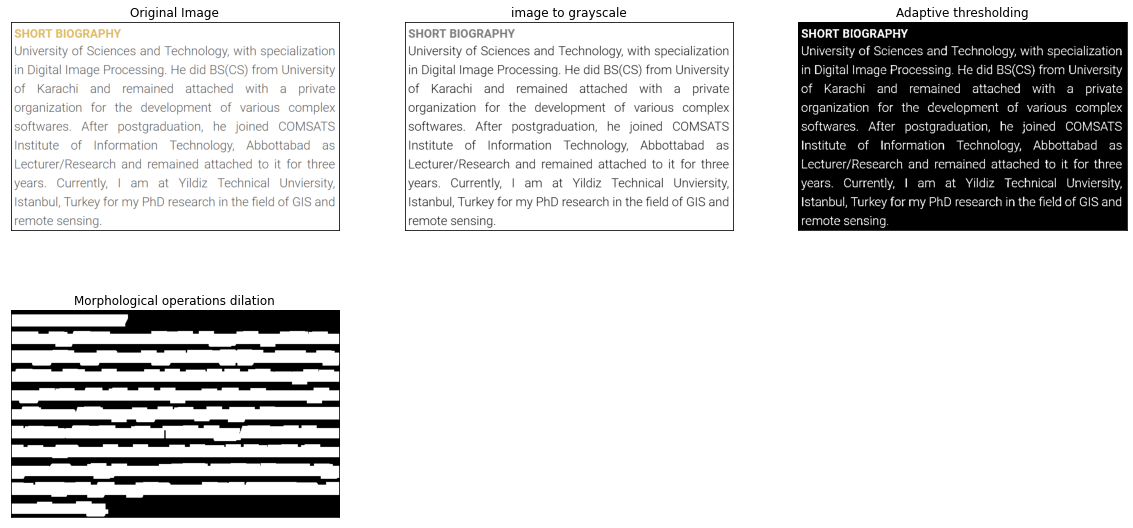

In [18]:
img = cv2.imread(r'./data/text.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply adaptive thresholding to create a binary image with the text in black and background in white
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=10)

# Apply morphological operations to remove noise and fill gaps in the text
kernel = np.ones((9, 33), np.uint8)
dilation = cv2.dilate(thresh,kernel, iterations=1)

totalLabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,8)

# Calculate the number of text lines
print("Number of text lines:", totalLabel-1)


# Display the original image
titles = ['Original Image', 'image to grayscale','Adaptive thresholding', 'Morphological operations dilation']
images = [img, gray, thresh, dilation]
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# b) Count the number of words in the given image

#### 1- Apply adaptive thresholding to create a binary image with the text in black and background in white
#### 2- Apply morphological operations dilation  fill gaps in the word
#### 3- connected component analysis on the binary image dilation, which means that it identifies distinct regions of the image that are connected together.

Number of text word: 75


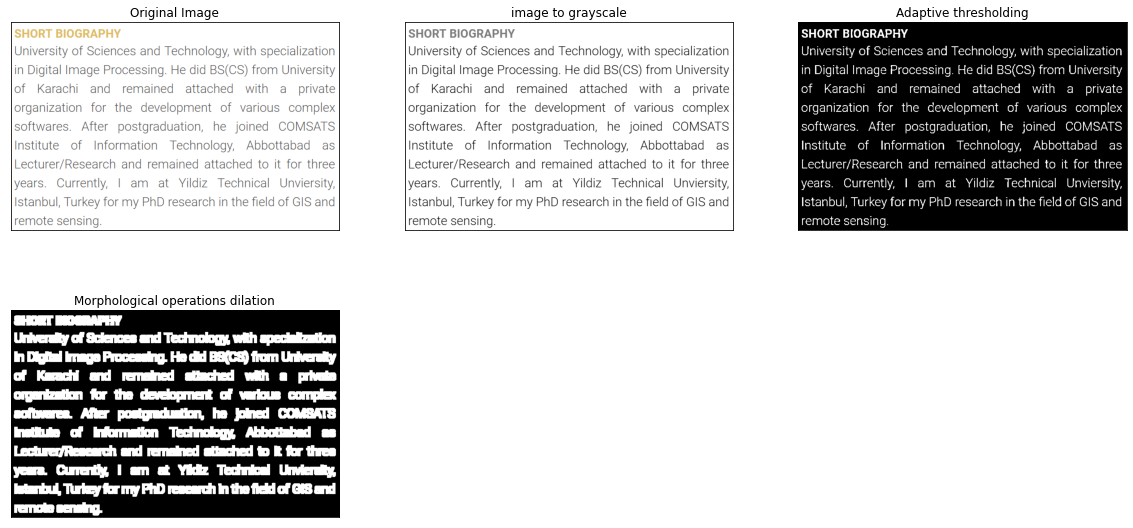

In [21]:
img = cv2.imread(r'./data/text.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply adaptive thresholding to create a binary image with the text in black and background in white
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=10)

# Apply morphological operations to remove noise and fill gaps in the text
kernel = np.ones((5, 6), np.uint8)
dilation = cv2.dilate(thresh,kernel, iterations=1)

totalLabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,8)

# Calculate the number of text lines
print("Number of text word:", totalLabel-1)


# Display the original image
titles = ['Original Image', 'image to grayscale','Adaptive thresholding', 'Morphological operations dilation']
images = [img, gray, thresh, dilation]
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Question 4.
## Consider the Sudoku game image shown in Figure 4. Only identify the empty squares, color them red,and display the output image. The rest of the squares will remain unchanged.

#### 1- Convert the image to grayscale and apply adaptive thresholding
#### 2- Apply morphological operations to remove noise and fill gaps
#### 3- Apply connected component analysis to identify the empty squares
#### 4- Compare the original image with the processed image and replace the pixel values accordingly

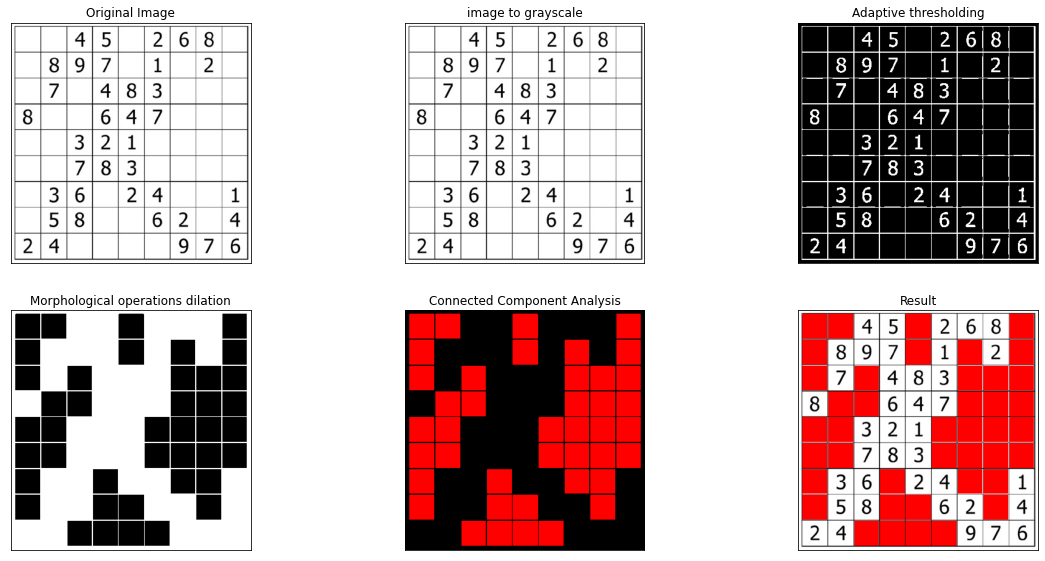

In [23]:
# Load the Sudoku game image
img = cv2.imread(r'./data/soduku.jpg')

# Convert the image to grayscale and apply adaptive thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=10)

# Apply morphological operations to remove noise and fill gaps
kernel = np.ones((13, 13), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Apply connected component analysis to identify the empty squares
totalLabel, labels, stats, centroids = cv2.connectedComponentsWithStats(closing, 8)

# Color the zero label (empty squares) in red and leave the rest as original
col = np.zeros((totalLabel, 3), dtype=np.uint8)
col[0] = (0, 0, 255)
col_sq = col[labels]


# Compare the original image with the processed image and replace the pixel values accordingly
result = img.copy()
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if np.array_equal(col_sq[i][j], np.array([0, 0, 255])):
            result[i][j] = np.array([0, 0, 255])
        else:
            result[i][j] = img[i][j]

# Display the original image
titles = ['Original Image', 'image to grayscale','Adaptive thresholding', 'Morphological operations dilation','Connected Component Analysis','Result']
images = [img, gray, thresh, closing,col_sq,result]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()




# Question 5.
# Figure 5 shows an image of the Urdu alphabet. All these characters have different widths and heights. For instance, Alif is thin but tall. Similarly, Pay has a more extended width than height and three  associated dots. 
# a) Write a program that displays all characters whose width exceeds their height.


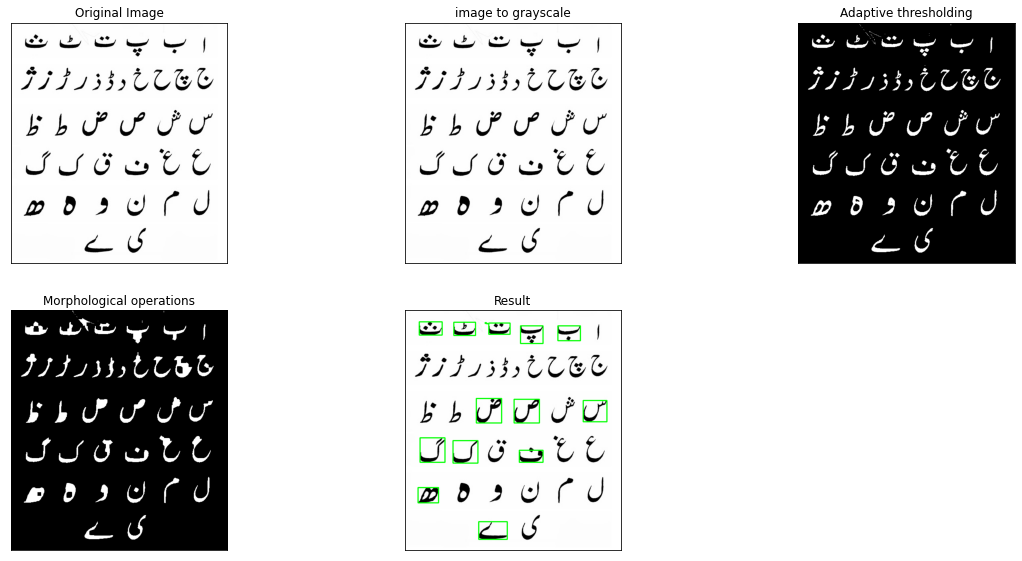

In [39]:
# Load the image and convert it to grayscale
img = cv2.imread('./data/alphabets-urdu.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert to binary
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=10)

# Apply morphological operations to remove noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours in the image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
result = img.copy()
# Loop through each contour
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Check if width exceeds height
    if w > h:
        # Draw a green rectangle around the contour
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)



# Display the original image
titles = ['Original Image', 'image to grayscale','Adaptive thresholding', 'Morphological operations','Result']
images = [img, gray, thresh, closing,result]
plt.figure(figsize=(20,15))
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

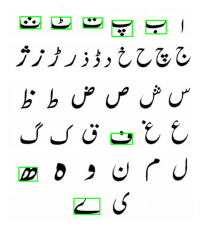

In [40]:
result = img.copy()

filtered_alphas=[]
for contour in contours:
    area = cv2.contourArea(contour)
    if area>300:
        filtered_alphas.append(contour)

wider_alphas=[]
for contour in filtered_alphas:
    # Get rectangle coordinates and dimensions
    x, y, w, h =  cv2.boundingRect(contour)
    # Draw rectangle on original image
    if w > h+10:
        wider_alphas.append(contour)
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
for contour in wider_alphas:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.imshow(result,cmap="gray")
plt.axis('off')
plt.show()


# b) Write a program that displays all the alphabets that have almost the same width and height

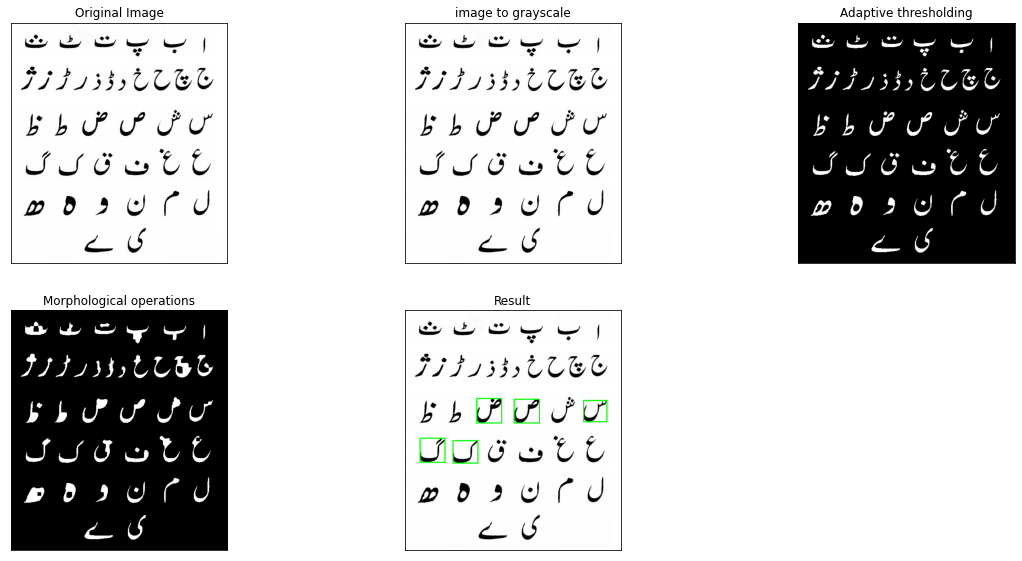

In [41]:
# Load the image and convert it to grayscale
img = cv2.imread(r'./data/alphabets-urdu.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert to binary
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=10)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply morphological operations to remove noise and fill gaps
kernel = np.ones((5, 5), np.uint8)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours in the image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = img.copy()
# Loop through each contour and check if it has almost same width and height
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if aspect_ratio > 1 and aspect_ratio < 1.2:
        # Draw a rectangle around the contour
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)





# Display the original image
titles = ['Original Image', 'image to grayscale','Adaptive thresholding', 'Morphological operations','Result']
images = [img, gray, thresh, closing,result]
plt.figure(figsize=(20,15))
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

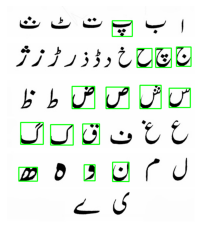

In [43]:
result = img.copy()
filtered=[]
for contour in contours:
    area = cv2.contourArea(contour)
    if area>300:
        filtered.append(contour)

equal_alphas=[]
for contour in filtered:
    # Get rectangle coordinates and dimensions
    x, y, w, h =  cv2.boundingRect(contour)
    # Draw rectangle on original image
    if w > h-15 and w<h+15:
        equal_alphas.append(contour)
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

for contour in equal_alphas:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(result,cmap="gray")
plt.axis('off')
plt.show()

# c) Write a program that displays all alphabets that have dots (Nukta).

Labels 69


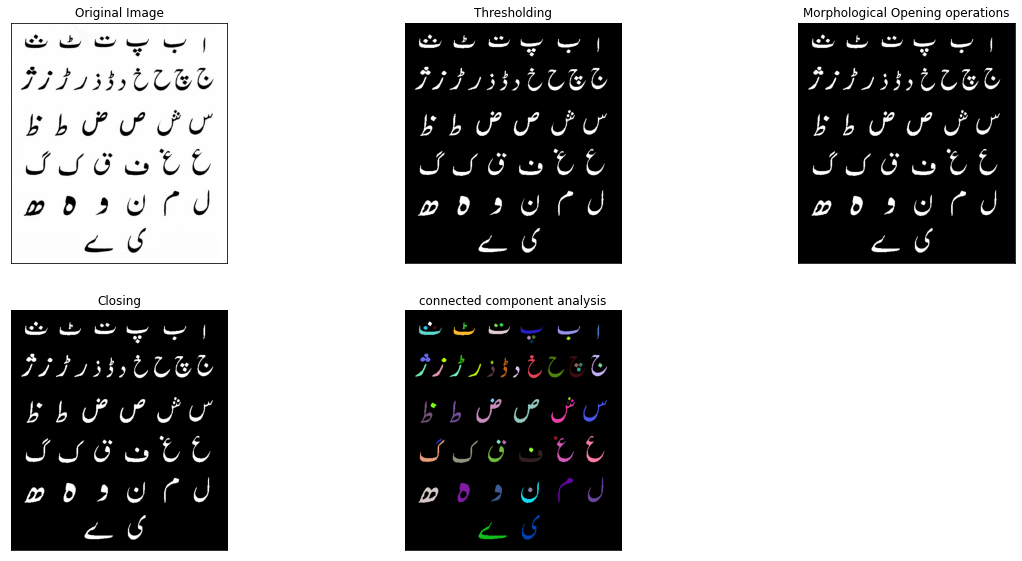

In [112]:
# Load the image of Urdu alphabets
img = cv2.imread('./data/alphabets-urdu.jpg',0)

# Threshold the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Define kernel for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,3))

# Apply morphological operations to remove noise and fill gaps
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


# Apply connected component analysis 
totalLabel, labels, stats, centroids = cv2.connectedComponentsWithStats(closing, 8)
print("Labels",totalLabel)


col = np.random.randint(0,255,size=(totalLabel,3),dtype = np.uint8)
col[0]= (0, 0, 0)
col[1]= (255, 255, 255)
col_sq = col[labels]

            
# Display the original image
titles = ['Original Image', 'Thresholding', 'Morphological Opening operations','Closing','connected component analysis']
images = [img, binary, opening, closing,col_sq]
plt.figure(figsize=(20,15))
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()



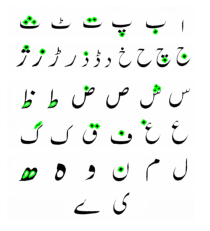

In [114]:
# Apply binary thresholding with a threshold value of 200
binary_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter Out dot Countours
dots=[]
# dot area range
for contour in contours:
    area = cv2.contourArea(contour)
    if area>50 and area<140:
        dots.append(contour)


cv2.drawContours(dialated_img, dots, -1, (0, 255, 0), 2)

plt.imshow(dialated_img,cmap="gray")
plt.axis('off')
plt.show()


#  Write a program to display all alphabets which are composed of four components, e.g. It has one body and three dots

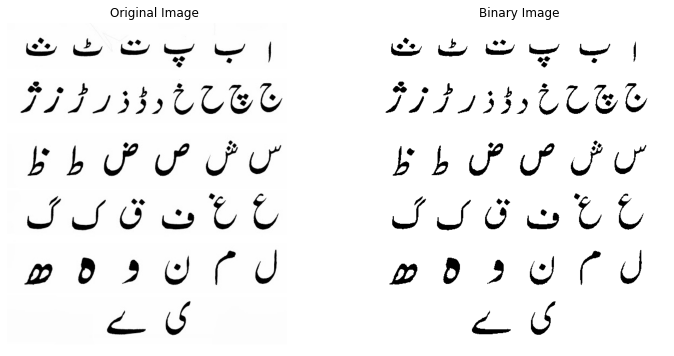

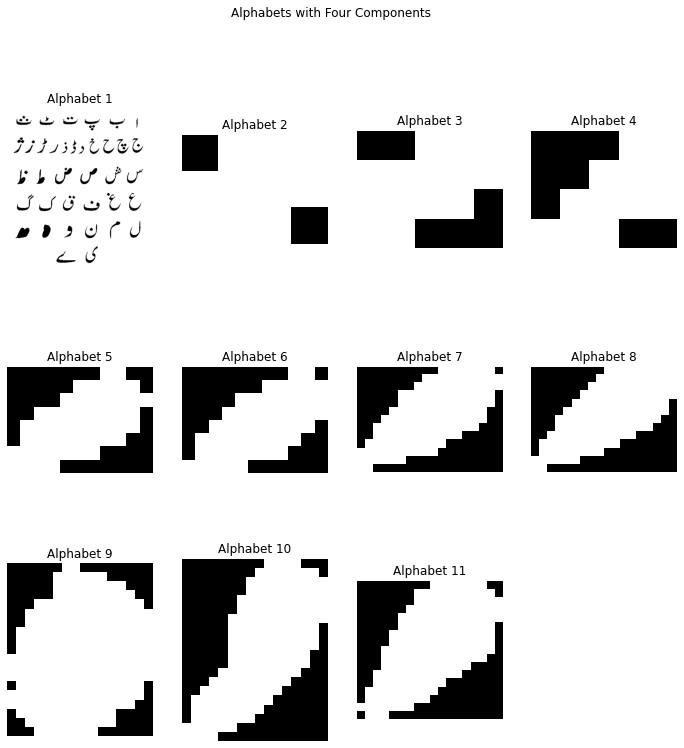

In [121]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import measure

# Reading the image from the given link
image = io.imread(r'./data/alphabets-urdu.jpg')

# Converting the image to grayscale
gray = color.rgb2gray(image)

# Defining a threshold to binarize the image
threshold = 0.5

# Creating a binary image by comparing the pixel values with the threshold
binary = gray > threshold

# Finding the connected components in the binary image
labels = measure.label(binary)

# Creating an empty list to store the alphabets with four components
alphabets = []

# Looping through each label
for label in np.unique(labels):

    # Ignoring the background label
    if label == 0:
        continue

    # Selecting the pixels belonging to the current label
    mask = np.zeros(binary.shape, dtype="bool")
    mask[labels == label] = True

    # Counting the number of components in the current label
    components = measure.label(mask)

    # If the number of components is four, append the label to the alphabets list
    if len(np.unique(components)) == 2:
        alphabets.append(label)

# Displaying the original image and the binary image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Displaying the alphabets with two components
plt.figure(figsize=(12,12))
n = len(alphabets)
for i in range(n):

    # Selecting the pixels belonging to the current alphabet
    mask = np.zeros(binary.shape, dtype="bool")
    mask[labels == alphabets[i]] = True

    # Cropping the image to fit the alphabet
    x,y = np.where(mask)
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    cropped = mask[x_min:x_max+1, y_min:y_max+1]

    # Plotting the alphabet
    plt.subplot(n//4+1, 4, i+1)
    plt.imshow(cropped, cmap="gray")
    plt.title(f"Alphabet {i+1}")
    plt.axis("off")

plt.suptitle("Alphabets with Four Components")
plt.show()

#  Write a code to display all alphabets which have holes in them. E.g., has two holes, has one hole

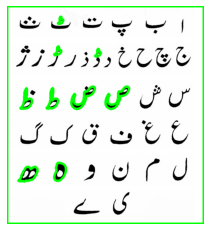

In [133]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Reading Img
img = cv2.imread(r'./data/alphabets-urdu.jpg');


# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
_, binary_img = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Contours Of Img
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



filtered_alphas=[]
# Dot area range
for contour in contours:
    area = cv2.contourArea(contour)
    if area>20 and area <10000:
        filtered_alphas.append(contour)
# 
contours_hole=[]
for i, contour in enumerate(contours):
    # Check if contour has child contours
    if hierarchy[0][i][2] != -1:
        contours_hole.append(contours[i])


cv2.drawContours(img, contours_hole, -1, (0, 255, 0), 5)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.show()

# Question 6.
## Figure 6 shows an image of a bubble sheet filled for an exam. There are five questions, and for each question, there are four choices. 
## Write a program that applies DIP techniques to identify the candidate's answer for each question. Display the output in the format as shown below:
## 1:A, 2:B, 3:C, 4: A, 5:D

Labels 42


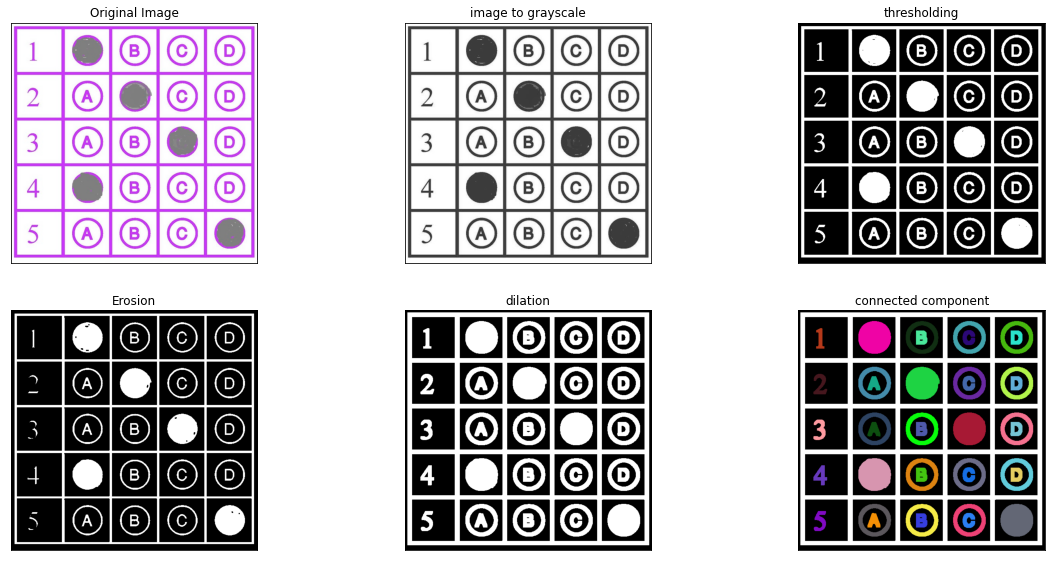

In [4]:
# Load the image
img = cv2.imread(r'./data/bubble.jpg')


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to convert the image to binary
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]

# Apply morphological operations to remove noise and fill gaps in the bubbles
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)
dilation = cv2.dilate(thresh, kernel, iterations=2)



# Apply connected component analysis to identify the empty squares
totalLabel, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation, 6)
print("Labels",totalLabel)


col = np.random.randint(0,255,size=(totalLabel,3),dtype = np.uint8)
col[0]= (0, 0, 0)
col[1]= (255, 255, 255)
col_sq = col[labels]





# Display the original image
titles = ['Original Image', 'image to grayscale','thresholding','Erosion', 'dilation','connected component']
images = [img, gray, thresh, erosion,dilation,col_sq]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()



## 1- Apply binary thresholding on the grayscale image using OpenCV's cv2.threshold() function. This creates a binary image where all pixels above a certain threshold value are set to white (255), and all pixels below the threshold are set to black (0). The thresholded image is stored in the thresh variable.

## 2- Find contours in the thresholded image using OpenCV's cv2.findContours() function. Contours are the boundaries of objects in an image. The contours and hierarchy information are stored in the contours and hierarchy variables, respectively.

## 3- Filter the contours based on their area. The code removes all contours with an area less than 10000 or greater than 15000 pixels. The filtered contours are stored in the filtered_contours list.

## 4- Sort the filtered contours based on their y-axis position using the sorted() function and the key parameter with the cv2.boundingRect() function.

## 5- Group the filtered contours that have y-coordinates within a certain range. The code creates a list of lists, where each sublist contains contours that are close together on the y-axis.

## 6- Sort the contours in each group based on their x-axis position using the sort() function and the key parameter with the cv2.boundingRect() function.

## 7- Find the contour with the maximum filled area within each group. The code iterates through each group and checks each contour to see if it is filled. If a contour is more than 65% filled, it is added to the filled_contours list, and its corresponding option is added to the correct_options list.

## 8- Draw the filled contours on a copy of the original image using OpenCV's cv2.drawContours() function. The copy of the image with the contours drawn on it is stored in the img_copy variable.


## 9- Print the correct option for each filled bubble found by iterating through the correct_options list and using the alphabats string to map the option number to a letter. The output is printed to the console.

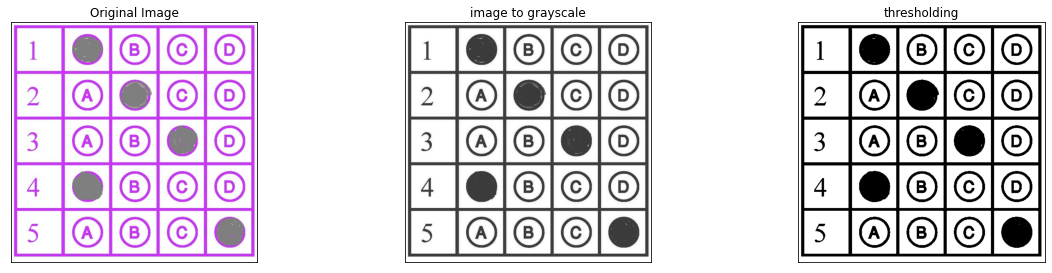

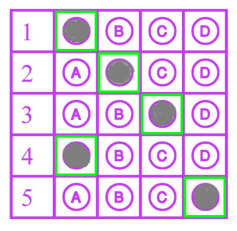

1 : A
2 : B
3 : C
4 : A
5 : D


In [12]:

img = cv2.imread(r'./data/bubble.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding with a threshold value of 200
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]


# Display the original image
titles = ['Original Image', 'image to grayscale','thresholding']
images = [img, gray, thresh]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if  10000 <=area <= 15000:
        filtered_contours.append(contour)

# Sorting the contours based on x axis
filtered_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[1])

# Group the contours that have y-coordinates within a certain range
grouped_contours = []
current_group = []
prev_y = None
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    if prev_y is not None and abs(y - prev_y) > 10:
        grouped_contours.append(current_group)
        current_group = []
    current_group.append(contour)
    prev_y = y
grouped_contours.append(current_group)
# Sorting Contours Along y Axis as well
for group in grouped_contours:
    group.sort(key=lambda c: cv2.boundingRect(c)[0])

# Now find the contour with maximum filled area

filled_contours=[]
correct_options=[]
for group in grouped_contours:
    for itr in range(1,len(group)):
        x, y, w, h = cv2.boundingRect(group[itr])
        section=thresh[y:y+h, x:x+w]
        count_nonzero = cv2.countNonZero(section);
        area=w*h
        
        if(count_nonzero/area<0.65):
            filled_contours.append(group[itr])
            correct_options.append(itr)
alphabats="_ABCDE";
# Draw the contours on a copy of the original image
img_copy = img.copy()
cv2.drawContours(img_copy,filled_contours , -1, (0, 255, 0), 5)
# Display the image with contours using Matplotlib
plt.imshow(img_copy)
plt.axis('off')
plt.show()



for i in range(len(correct_options)):
    print(i+1, ":",alphabats[correct_options[i]])